# Assignment 2 - Unsupervised Learning 
`

In [26]:
import pandas as pd
from pathlib import Path
import datetime as dt
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FuncFormatter, StrMethodFormatter
%matplotlib inline

#import plotly as ply
import plotly.graph_objects as go



import pandas as pd
from datetime import datetime
#from sklearn.metrics import mean_squared_error


import sklearn
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score



from functools import reduce
from operator import mul
from pprint import PrettyPrinter
pprint = PrettyPrinter().pprint

import seaborn as sns
sns.set()


import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

#### Task 1 (3 points):

1. Data normalization
    - Look at features of Linnerud dataset, tell what is the problem with them
          from sklearn.datasets import load_linnerud
    - Normalize these features using a correct method. Plot original vs normalized probability density.

In [27]:
from sklearn.datasets import load_linnerud

dataset = load_linnerud()
df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
df_target = pd.DataFrame(dataset['target'], columns=dataset['target_names'])
for column in df_target.columns:
    df[column] = df_target[column]
df.describe()

,Chins,Situps,Jumps,Weight,Waist,Pulse
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,9.450000,145.550000,70.30000,178.600000,35.400000,56.100000
std,5.286278,62.566575,51.27747,24.690505,3.201973,7.210373
min,1.000000,50.000000,25.00000,138.000000,31.000000,46.000000
25%,4.750000,101.000000,39.50000,160.750000,33.000000,51.500000
50%,11.500000,122.500000,54.00000,176.000000,35.000000,55.000000
75%,13.250000,210.000000,85.25000,191.500000,37.000000,60.500000
max,17.000000,251.000000,250.00000,247.000000,46.000000,74.000000


Note: the table show features with different ranges(max - min)

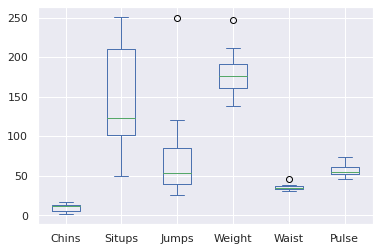

In [28]:
df.plot(kind='box')#Box plot to check outlier

Note: Box plot shows, there are outliers at Jump,Weight and Waist

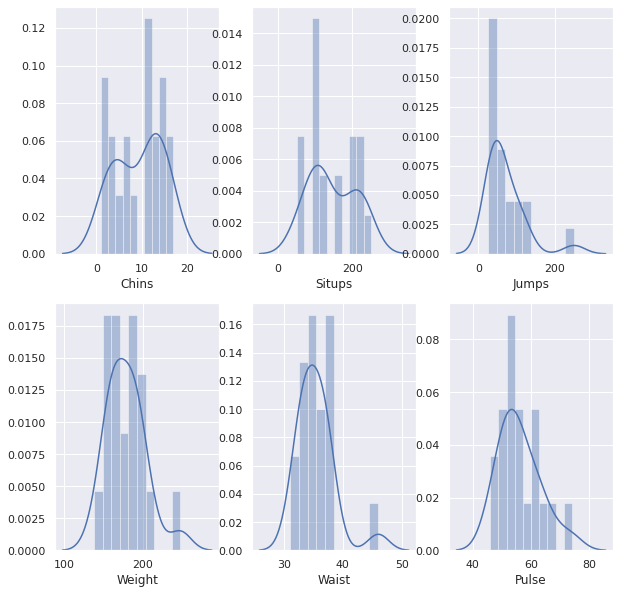

In [29]:
#distribution plot

fig, axes = plt.subplots(2, 3)
fig.set_size_inches(10, 10)
for ax, col in zip(axes.flatten(), df.columns):
    sns.distplot(df[col], ax=ax, bins=10)

The Linnerud data contains features with different ranges and scales. Chins show 1-17 range, Situps 50 to 251, Jumps 25-250 . And they are not normally distributed and jumps, weight and waist have outliers. So, it is beter to scale the data between 0-1.

In [30]:
from sklearn.preprocessing import QuantileTransformer

X = np.array(df)
qts = QuantileTransformer().fit(X)
X = qts.transform(X)
df_transform = pd.DataFrame(X, columns=df.columns)

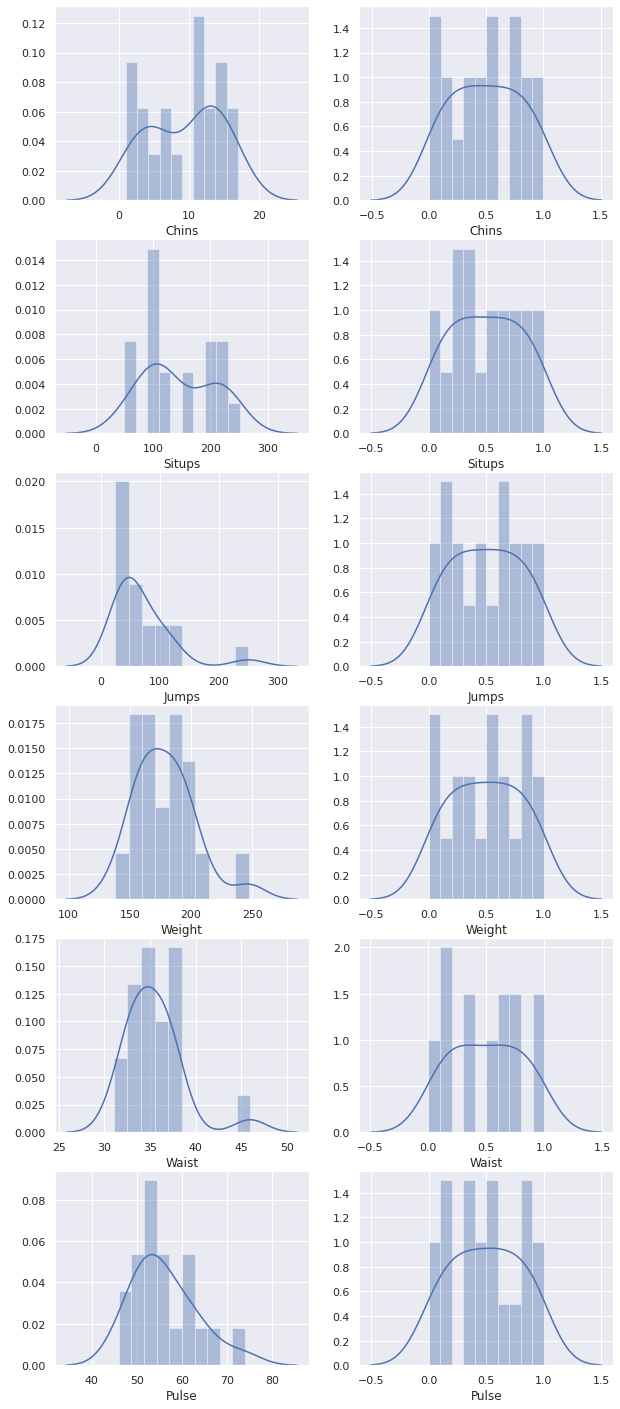

In [31]:
fig, axes = plt.subplots(6, 2)
fig.set_size_inches(10, 25)
for ax, col in zip(axes, df.columns):
    sns.distplot(df[col], ax=ax[0], bins=10)
    sns.distplot(df_transform[col], ax=ax[1], bins=10)

Note:- The above figure shows the density distribution plot before and after transformation. The second plot is a normal distribution with mean 0.5 and standard deviation 1

#### Task 2 (4 points):  
2. Dimensionality reduction
    - Load 20 News Dataset
          from sklearn.datasets import fetch_20newsgroups_vectorized
          data = fetch_20newsgroups_vectorized(subset='train')
    - Use KernelPCA for dimensionality reduction. Train a classifier at different nr of dimensions, check how model score changes with dimensions
          Remember that you can load training and testing subsets of data!

In [32]:
from sklearn.datasets import fetch_20newsgroups_vectorized

L1, L2 = [100, 1000] #take a samples to reduce processing time
data_train = fetch_20newsgroups_vectorized(subset='train')
data_test = fetch_20newsgroups_vectorized(subset='test')

X_train, y_train = data_train.data[:L2], data_train.target[:L2]
X_test, y_test = data_test.data[:L1], data_test.target[:L1]

In [33]:
from sklearn.decomposition import KernelPCA
from sklearn.neighbors import KNeighborsClassifier

for n in [1, 4, 10,15, 20,30, 50, 1000]:
    pca = KernelPCA(n_components=n, kernel="cosine")
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    Knn_model = KNeighborsClassifier(n_neighbors = 10).fit(X_train_pca, y_train)
    accuracy = Knn_model.score(X_test_pca, y_test)
    
    print(f'Accuracy with PCA and {n} components = {accuracy}')

Accuracy with PCA and 1 components = 0.13
Accuracy with PCA and 4 components = 0.11
Accuracy with PCA and 10 components = 0.18
Accuracy with PCA and 15 components = 0.15
Accuracy with PCA and 20 components = 0.18
Accuracy with PCA and 30 components = 0.19
Accuracy with PCA and 50 components = 0.23
Accuracy with PCA and 1000 components = 0.13


#### Task 3 (8 points):

3. Clustering
    - Cluster 20 News Dataset into 20 clusters. Print true class vs cluster distribution. 
          Did you manage to recover the original clusters?  (give students an example plot)

In [34]:
data = fetch_20newsgroups_vectorized(subset='train')
X, y = data['data'], data['target']

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20).fit(X)

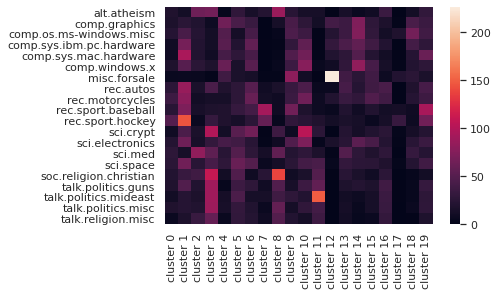

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

cm = confusion_matrix(y, kmeans.predict(X))
sn.heatmap(cm, yticklabels=data['target_names'], 
           xticklabels=["cluster {}".format(i) for i in range(20)])